# Dados de Galton: estudo sobre Alturas 

In [59]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

importando dados do Galton

In [43]:
Galton = pd.read_csv('C:/Users/crrodr/Documents/1. Conhecimento/Tera - Data Science/TURMA_4_201808/Regressao_Linear/Exemplo_Galton_simples/Galton.csv')

In [44]:
#Cria uma nova variável que é a média das alturas dos pais
Galton["Mean_Parents"]= (Galton['Father'] + Galton['Mother'])/2
Galton["target"]= Galton['Height']

In [45]:
Galton.head(10)  
## Variáveis disponíveis: 
## Family: Família de origem
## Father: Altura do Pai
## Mother: Altura da Mãe
## Gender: Sexo do Filho
## Height=target: Altura do Filho
## Kids: Quantidade de Filhos
## Mean_Parents: Média da Altura do Pai e da Mãe

,Family,Father,Mother,Gender,Height,Kids,Mean_Parents,target
0,1,1.9939,1.7018,M,1.85928,4,1.84785,1.85928
1,1,1.9939,1.7018,F,1.75768,4,1.84785,1.75768
2,1,1.9939,1.7018,F,1.75260,4,1.84785,1.75260
3,1,1.9939,1.7018,F,1.75260,4,1.84785,1.75260
4,2,1.9177,1.6891,M,1.86690,4,1.80340,1.86690
5,2,1.9177,1.6891,M,1.84150,4,1.80340,1.84150
6,2,1.9177,1.6891,F,1.66370,4,1.80340,1.66370
7,2,1.9177,1.6891,F,1.66370,4,1.80340,1.66370
8,3,1.9050,1.6256,M,1.80340,2,1.76530,1.80340
9,3,1.9050,1.6256,F,1.72720,2,1.76530,1.72720


## Parte_1: Avaliando a Correlação entre as variáveis 
Altura Pai, Altura Mãe e Média da altura dos Pais com a Altura Filho 

### Gráficos e Coeficiente de Correlação

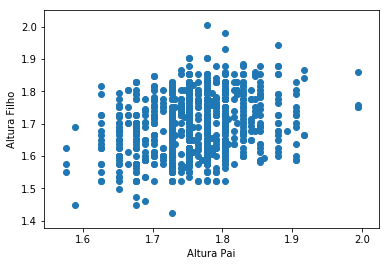

0.27680081103482701

In [46]:
X = Galton['Father']
Y = Galton['Height']
plt.scatter(X,Y)
plt.xlabel("Altura Pai")
plt.ylabel("Altura Filho")
plt.show() 

# Correlação da variável target (Altura_Filhos) com a variável explicativa Altura Pai
Galton['Father'].corr(Galton['Height'])

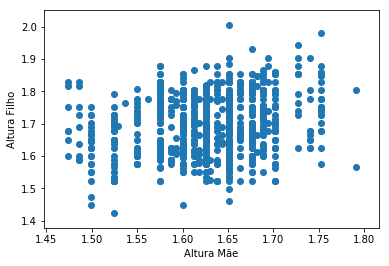

0.20203872284119712

In [47]:
M = Galton['Mother']
plt.scatter(M,Y)
plt.xlabel("Altura Mãe")
plt.ylabel("Altura Filho")
plt.show() 

# Correlação da variável target (Altura_Filhos) com a variável explicativa Altura Mãe
Galton['Mother'].corr(Galton['Height'])

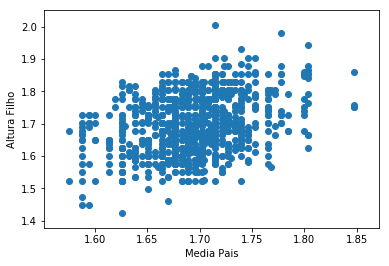

0.32817910208512924

In [48]:
Z= Galton['Mean_Parents']
plt.scatter(Z,Y)
plt.xlabel("Media Pais")
plt.ylabel("Altura Filho")
plt.show() 

# Correlação da variável target (Altura_Filhos) com a variável explicativa Altura Média dos Pais
Galton['Mean_Parents'].corr(Galton['Height'])

## Parte_2: Ajustando um Modelo de regressão linear simples para determinar a relação entre a Altura do Pai e a Altura do Filho
## Sklearn

In [49]:
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
# Z_train: Média da Altura do Pai e da Mãe
regr.fit(X, Y)
Y_pred = regr.predict(X)

beta1=regr.coef_
intercepto=regr.intercept_

print('beta1',beta1)
print('intercepto',intercepto)


beta1 [[ 0.40021354]]
intercepto [ 0.99176443]


In [50]:
#Calculando o R^2
r2_train = regr.score(X,Y)
print('r2_train',r2_train)

r2_train 0.0766186889895


## Parte_3: Ajustando um Modelo de regressão linear simples para determinar a relação entre a Altura do Pai e a Altura do Filho.
## Statsmodel

In [51]:
#Ajustando Mod de reg linear na biblioteca statsmodel
#Usando a biblioteca statsmodels
import statsmodels.api as sm

X_7 = sm.add_constant(X) #adiciona a cte a base de dados
est7 = sm.OLS(Y, X_7)
est77 = est7.fit()
print(est77.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     73.68
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.06e-17
Time:                        19:36:34   Log-Likelihood:                 905.47
No. Observations:                 890   AIC:                            -1807.
Df Residuals:                     888   BIC:                            -1797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9918      0.082     12.087      0.0

Ao interpretar os coeficientes do modelo nota-se que não faz sentido utilizar o intercepto no modelo, pois quando a altura do pai for zero, ou seja, quando não tiver pai, a altura do filho também vai ser zero, pois não existirá filho
<br>
Desta maneira vamos ajustar novamente o modelo, mas agora sem intercepto

In [52]:
#Ajustando Mod de reg linear na biblioteca statsmodel
#Usando a biblioteca statsmodels
#não vou adicionar intercepto a esse modelo
import statsmodels.api as sm

est7 = sm.OLS(Y, X)
est77 = est7.fit()
print(est77.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.867e+05
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:36:34   Log-Likelihood:                 837.69
No. Observations:                 890   AIC:                            -1673.
Df Residuals:                     889   BIC:                            -1669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9634      0.002    535.469      0.0

## Parte_4: Ajustando um Modelo de Regressão Linear Multipla usando statsmodel
Utilizando as Variáveis: altura do pai e da mae

In [53]:
### Criando amostra de teste e treinamento (Cuidado Overfiting)

Y= Galton['Height']
Y=Y.values.reshape(len(Y),1)
Y_train = Y[:-445]
Y_test = Y[-445:]

X2_train = Galton[:-445] #Seleciona as primeiras 445 obs para treinar
X2_test = Galton[-445:]  #Seleciona as obs a partir da obs 445 para testar
X2_train=X2_train.drop(["Family","Height","Gender","Kids","Mean_Parents","target"],axis=1)
X2_test=X2_test.drop(["Family","Height","Gender","Kids","Mean_Parents","target"],axis=1)

X2_train.head()

,Father,Mother
0,1.9939,1.7018
1,1.9939,1.7018
2,1.9939,1.7018
3,1.9939,1.7018
4,1.9177,1.6891


In [54]:
# Ajusta um modelo de reg linear multipla com as variáveis Altura pai e Altura mãe
regr.fit(X2_train, Y_train)

beta1=regr.coef_
intercepto=regr.intercept_

print('beta1',beta1)
print('intercepto',intercepto)

#R quadrado da amostra de treinamento
r2_train = regr.score(X2_train,Y_train)
print('r2_train',r2_train)

#R quadrado da amostra de teste
r2_test = regr.score(X2_test,Y_test)
print('r2_test',r2_test)

beta1 [[ 0.25934756  0.32925071]]
intercepto [ 0.71045998]
r2_train 0.0582263353833
r2_test 0.0156411115506


In [55]:
#Usando a biblioteca statsmodels
#Modelo COM intercepto

X2_train_1 = sm.add_constant(X2_train) #adiciona a cte a base de dados
est = sm.OLS(Y_train, X2_train_1)
est2 = est.fit()

print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     13.66
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.75e-06
Time:                        19:36:34   Log-Likelihood:                 455.83
No. Observations:                 445   AIC:                            -905.7
Df Residuals:                     442   BIC:                            -893.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7105      0.221      3.219      0.0

In [56]:
#Usando a biblioteca statsmodels
#Modelo SEM intercepto
est = sm.OLS(Y_train, X2_train)
est2 = est.fit()
predictions = est2.predict() 
residuos = Y_train - predictions
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.466e+04
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:36:34   Log-Likelihood:                 450.67
No. Observations:                 445   AIC:                            -897.3
Df Residuals:                     443   BIC:                            -889.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Father         0.5344      0.052     10.267      0.0

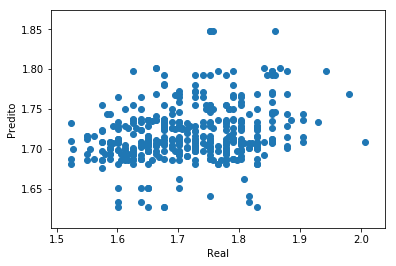

In [38]:
#Verificando a correlação entre o valor real e o predito
plt.scatter(Y_train,predictions)
plt.xlabel("Real")
plt.ylabel("Predito")
plt.show()